In [1]:
import xml.etree.ElementTree as ET
import re
import pandas as pd
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
import datasets
from collections import Counter

c:\Users\Aurelio\Documents\BA\New Bachelor\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#manually add parties of politicians with missing party information
politicians_parties = {
    'Thomas Strobl': 'CDU/CSU',
    'Christian Kühn': 'BÜNDNIS 90/DIE GRÜNEN',  # Fill in party
    'Boris Pistorius': 'SPD',
    'Katja Hessel': 'FDP',
    'Heiko Maas': 'SPD',
    'Elisabeth Kaiser': 'SPD',  # Fill in party
    'Rita Schwarzelühr-Sutter': 'SPD',
    'Pascal Kober': 'FDP',
    'Katja Keul': 'BÜNDNIS 90/DIE GRÜNEN',
    'Luise Amtsberg': 'BÜNDNIS 90/DIE GRÜNEN',
    'Sven Lehmann': 'BÜNDNIS 90/DIE GRÜNEN',
    'Christine Lambrecht': 'SPD',
    'Dr. Jan-Niclas Gesenhues': 'BÜNDNIS 90/DIE GRÜNEN',
    'Bettina Stark-Watzinger': 'FDP',
    'Dr. Jörg Steinbach': 'SPD',
    'Dr. Joachim Stamp': 'FDP',
    'Natalie Pawlik': 'SPD',
    'Ekin Deligöz': 'BÜNDNIS 90/DIE GRÜNEN',
    'Dr. Anna Lührmann': 'BÜNDNIS 90/DIE GRÜNEN',
    'Annalena Baerbock': 'BÜNDNIS 90/DIE GRÜNEN',
    'Michael Theurer': 'FDP',
    'Steffi Lemke': 'BÜNDNIS 90/DIE GRÜNEN',
    'Kerstin Griese': 'SPD',
    'Bettina Jarasch': 'BÜNDNIS 90/DIE GRÜNEN',
    'Dr. Mehmet Daimagüler': 'Fraktionslos',  # Fill in party
    'Dieter Janecek': 'BÜNDNIS 90/DIE GRÜNEN',
    'Daniela Kluckert': 'FDP',
    'Sarah Ryglewski': 'SPD',
    'Oliver Krischer': 'BÜNDNIS 90/DIE GRÜNEN',
    'Lisa Paus': 'BÜNDNIS 90/DIE GRÜNEN',
    'Dr. Eva Högl': 'SPD',
    'Dr. Marco Buschmann': 'FDP',
    'Sabine Dittmar': 'SPD',
    'Daniela Behrens': 'SPD',
    'Burkhard Blienert': 'SPD',
    'Dr. Reiner Haseloff': 'CDU/CSU',
    'Dr. Anna Christmann': 'BÜNDNIS 90/DIE GRÜNEN',
    'Christian Lindner': 'FDP',
    'Carsten Schneider': 'SPD',
    'Dr. Franziska Brantner': 'BÜNDNIS 90/DIE GRÜNEN',
    'Thomas Hitschler': 'SPD',
    'Wolfgang Schmidt': 'SPD',
    'Thomas Schmidt': 'CDU/CSU',  # Fill in party
    'Mahmut Özdemir': 'SPD',
    'Dr. Florian Toncar': 'FDP',
    'Karl-Josef Laumann': 'CDU/CSU',
    'Dr. Edgar Franke': 'SPD',
    'Dr. Bärbel Kofler': 'SPD',
    'Dr. Dietmar Woidke': 'SPD',
    'Dr. Jörg Kukies': 'SPD',  # Fill in party
    'Uli Grötsch': 'SPD',
    'Dr. Tobias Lindner': 'BÜNDNIS 90/DIE GRÜNEN',
    'Dr. Karl Lauterbach': 'SPD',
    'Mario Brandenburg': 'FDP',
    'Katja Kipping': 'DIE LINKE',
    'Armin Schuster': 'CDU/CSU',
    'Sören Bartol': 'SPD',
    'Olaf Scholz': 'SPD',
    'Peter Beuth': 'CDU/CSU',
    'Ingmar Jung': 'CDU/CSU',
    'Bodo Ramelow': 'DIE LINKE',
    'Nancy Faeser': 'SPD',
    'Dr. Kristina Sinemus': 'CDU/CSU',
    'Judith Gerlach': 'CDU/CSU',
    'Dr. Ophelia Nick': 'BÜNDNIS 90/DIE GRÜNEN',
    'Reem Alabali-Radovan': 'SPD',
    'Klara Geywitz': 'SPD',
    'Dr. Bettina Hoffmann': 'BÜNDNIS 90/DIE GRÜNEN',
    'Dr. Roman Poseck': 'CDU/CSU',  # Fill in party
    'Anette Kramme': 'SPD',
    'Svenja Schulze': 'SPD',
    'Siemtje Möller': 'SPD',
    'Niels Annen': 'SPD',
    'Cansel Kiziltepe': 'SPD',
    'Cem Özdemir': 'BÜNDNIS 90/DIE GRÜNEN',
    'Dr. Dirk-UlrichLena Mende Kreck': '',  # Fill in party
    'Anne Spiegel': 'BÜNDNIS 90/DIE GRÜNEN',
    'Marion Gentges': 'CDU/CSU',
    'Christian Pegel': 'SPD',  # Fill in party
    'Klaus Holetschek': 'CDU/CSU',
    'Dr. Robert Habeck': 'BÜNDNIS 90/DIE GRÜNEN',
    'Oliver Luksic': 'FDP',
    'Dr. Volker Wissing': 'FDP',
    'Johann Saathoff': 'SPD',
    'Claudia Müller': 'BÜNDNIS 90/DIE GRÜNEN',
    'Dr. Andreas Pinkwart': 'FDP',
    'Dr. Felor Badenberg': 'Fraktionslos',  # Fill in party
    'Benjamin Strasser': 'FDP',
    'Anke Rehlinger': 'SPD',
    'Michael Kellner': 'BÜNDNIS 90/DIE GRÜNEN',
    'Dr. Andreas Bovenschulte': 'SPD',
    'Sven Schulze': 'CDU/CSU',
    'Hubertus Heil': 'SPD',
    'Dr. Jens Brandenburg': 'FDP',
    'Claudia Roth': 'BÜNDNIS 90/DIE GRÜNEN',
    "Friedrich Merz": "CDU/CSU",
    "Lars Klingbeil": "SPD",
    "Alexander Dobrindt": "CDU/CSU",
    "Saskia Esken": "SPD",
    "Dietmar Bartsch": "DIE LINKE",
    "Alice Weidel": "AfD",
    "Tino Chrupalla": "AfD",
    "Dr. Johann David Wadephul": "CDU/CSU",
}


In [4]:
#remove all "formal" interruptions. E.g. by Bundestag president Bärbel Bas who reminds the speaker of the time
def remove_formal_interruptions(speech):
    formal_interruption = False
    for child in list(speech):
            if child.tag == "name":
                formal_interruption = True
                speech.remove(child)
            elif formal_interruption and child.tag == "p" and child.attrib.get("klasse") != "redner":
                speech.remove(child)
            elif formal_interruption and child.attrib["klasse"] == "redner":
                formal_interruption = False
    return speech

In [5]:
def merge_subspeeches(df):
    #if the speaker in len(df)-1 is the same as the speaker in len(df)-2 merge the speeches because the interruption was due to a formal reason
    if len(df) > 1 and df["speaker"][len(df)-1] == df["speaker"][len(df)-2]:
        df.loc[len(df)-2,"speech"] = df["speech"][len(df)-2] + " " + df["speech"][len(df)-1]
        df = df.drop(len(df)-1)
    return df

In [6]:
dataset = datasets.DatasetDict()
all_datasets = []

for file_name in tqdm(os.listdir(".\Protokolle 20. Bundestag"), desc="Processing Files", unit="file"):

        df = pd.DataFrame(columns=["speaker", "party", "speech", "protocol","rede_id","main"])
        path = os.path.join(".\Protokolle 20. Bundestag", file_name)
        tree = ET.parse(path)
        root = tree.getroot()
        reden = root.findall(".//rede")

        for rede in reden:
                counter = 0
                speech_str = ""
                speaker_info = False
                titel = ""
                full_name = ""
                fraktion = ""
                rede_id = rede.get("id")
                
                for kommentar in rede.findall(".//kommentar"):
                        rede.remove(kommentar)

                rede = remove_formal_interruptions(rede)

                #iterate through all elements of the speech and extract the speaker information and the speech text
                for element in rede.iter():
                        #if we find a speaker element, either the main speach starts or a new (sub-)speaker starts
                        if element.tag == "p" and element.attrib.get("klasse") == "redner":
                                #if the speech_str is not empty, we have a new (sub-)speaker
                                if speech_str != "":
                                        #error handling 
                                        if full_name == "" or full_name is None:
                                                print("Error in file: ", file_name, "Rede ID: ", rede_id, " No speaker information found")
                                        if fraktion == "" or fraktion is None:
                                                print("Error in file: ", file_name, "Rede ID: ", rede_id, " No party information found")
                                        #add the speech to the dataframe
                                        df.loc[len(df)] = [full_name, fraktion, speech_str, file_name, rede_id, True if counter == 0 else False]
                                        counter += 1
                                        #merge the speeches if the interruption was due to a formal reason
                                        df = merge_subspeeches(df)

                                speaker_info = True
                                speech_str = ""
                                titel = ""

                        #extract the speaker information
                        if speaker_info and element.tag == "titel":
                                titel = element.text
                        if speaker_info and element.tag == "vorname":
                                vorname = element.text
                        if speaker_info and element.tag == "nachname":
                                nachname = element.text
                                if titel != "":
                                        full_name = f"{titel} {vorname} {nachname}"
                                else:
                                        full_name = f"{vorname} {nachname}"
                        if speaker_info and element.tag == "fraktion":
                                fraktion = element.text
                        if speaker_info and element.tag == "rolle":
                                try:
                                        fraktion = politicians_parties[full_name]     
                                except KeyError:
                                        fraktion = "to be filled"

                        #extract the speech text
                        if element.tag == "p" and element.attrib.get("klasse") != "redner":
                                if element.text is not None:
                                        speech_str += element.text + " "
                                speaker_info = False

                
                if fraktion == "" or fraktion is None:
                        print("Error in file: ", file_name, "Rede ID: ", rede_id, " No party information found")
                #add the last speech to the dataframe
                df.loc[len(df)] = [full_name, fraktion, speech_str, file_name, rede_id, True if counter == 0 else False]
                df = merge_subspeeches(df)

        # df.to_sql("speeches_21_Bundestag", conn, if_exists="append", index=False)
        all_datasets.append(datasets.Dataset.from_pandas(df))

dataset = datasets.concatenate_datasets(all_datasets)

Processing Files:  41%|████▏     | 82/198 [00:24<00:35,  3.29file/s]

Error in file:  protocol_5546.xml Rede ID:  ID208205200  No party information found


Processing Files:  55%|█████▍    | 108/198 [00:32<00:27,  3.28file/s]

Error in file:  protocol_5577.xml Rede ID:  ID2010905000  No party information found


Processing Files: 100%|██████████| 198/198 [01:01<00:00,  3.21file/s]


In [7]:
dataset
dataset = dataset.remove_columns(["__index_level_0__"])

In [8]:
dataset

Dataset({
    features: ['speaker', 'party', 'speech', 'protocol', 'rede_id', 'main'],
    num_rows: 26648
})

In [9]:
from collections import Counter

counts = Counter(dataset["party"])
counts

Counter({'SPD': 6709,
         'CDU/CSU': 6110,
         'FDP': 3696,
         'BÜNDNIS\xa090/DIE GRÜNEN': 3388,
         'AfD': 2991,
         'DIE LINKE': 1523,
         'BÜNDNIS 90/DIE GRÜNEN': 1009,
         'Die Linke': 324,
         'fraktionslos': 274,
         'Fraktionslos': 187,
         'BSW': 122,
         'BÜNDNIS\xa090/DIE\n                    GRÜNEN': 121,
         'BÜNDNIS\xa090/DIE\n                            GRÜNEN': 64,
         'BÜNDNIS\xa090/DIE\n                                GRÜNEN': 38,
         'DIE\n                    LINKE': 36,
         'BÜNDNIS\xa090/DIE\n                        GRÜNEN': 24,
         'DIE\n                                LINKE': 13,
         'DIE\n                        LINKE': 10,
         'SPDCDU/CSU': 6,
         '': 2,
         'BÜNDNIS\xa090/DIE\n                                    GRÜNEN': 1})

In [10]:
# Define a function to clean the party name based on keywords
def clean_party_name(party):
    if not party or party.strip() == "":
        return "Unknown"  # Handle empty or null values
    party = party.lower()  # Convert to lowercase for case-insensitive matching
    if "linke" in party:
        return "DIE LINKE"
    elif "grünen" in party or "bündnis" in party:
        return "BÜNDNIS 90/DIE GRÜNEN"
    elif "spd" in party:
        return "SPD"
    elif "cdu" in party or "csu" in party:
        return "CDU/CSU"
    elif "fdp" in party:
        return "FDP"
    elif "afd" in party:
        return "AfD"
    elif "bsw" in party:
        return "BSW"
    elif "fraktionslos" in party:
        return "Fraktionslos"
    else:
        return "Other"  # For unrecognized party names

dataset = dataset.map(lambda x: {"party": clean_party_name(x["party"])})

Map:   0%|          | 0/26648 [00:00<?, ? examples/s]

Map: 100%|██████████| 26648/26648 [00:03<00:00, 8456.74 examples/s] 


In [11]:
#remove fraktionlos and other
dataset = dataset.filter(lambda x: x["party"] not in ["Fraktionslos", "Other","Unknown","BSW"])


Filter: 100%|██████████| 26648/26648 [00:00<00:00, 54715.77 examples/s]


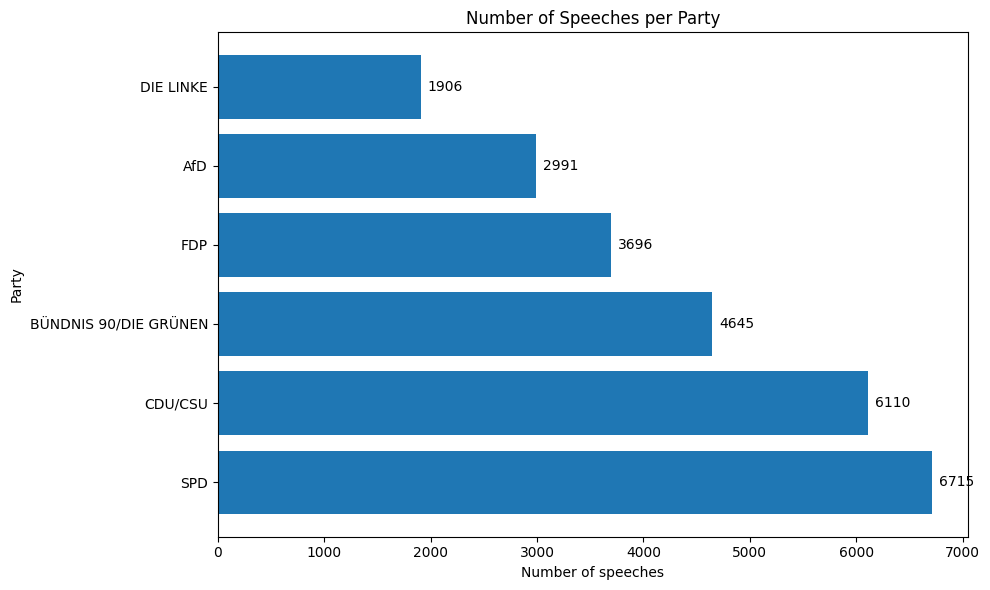

In [12]:

speeches_counter = Counter(dataset["party"])

# sort by count descending
parties, counts = zip(*speeches_counter.most_common())

fig, ax = plt.subplots(figsize=(10, 6))

# horizontal bars
bars = ax.barh(parties, counts)

ax.set_xlabel("Number of speeches")
ax.set_ylabel("Party")
ax.set_title("Number of Speeches per Party")

# annotate counts next to each bar
for bar in bars:
    w = bar.get_width()
    ax.text(w + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
            f"{int(w)}", va='center')

plt.tight_layout()
plt.show()

Safe the base dataset now


In [13]:
dataset.save_to_disk("bundestag_20_base")

Saving the dataset (0/1 shards):   0%|          | 0/26063 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 26063/26063 [00:00<00:00, 84158.87 examples/s]


Remove short speeches

In [37]:
dataset = dataset.filter(lambda x: len(x["speech"].split()) >= 70)

Filter: 100%|██████████| 4924/4924 [00:00<00:00, 14285.30 examples/s]


In [14]:
import numpy as np
# compute lengths
lengths = [len(s.split()) for s in dataset["speech"]]

mean_length = np.mean(lengths)
std_length = np.std(lengths)
print(f"Mean speech length: {mean_length:.2f} words")
print(f"Standard deviation of speech length: {std_length:.2f} words")

Mean speech length: 467.87 words
Standard deviation of speech length: 300.37 words


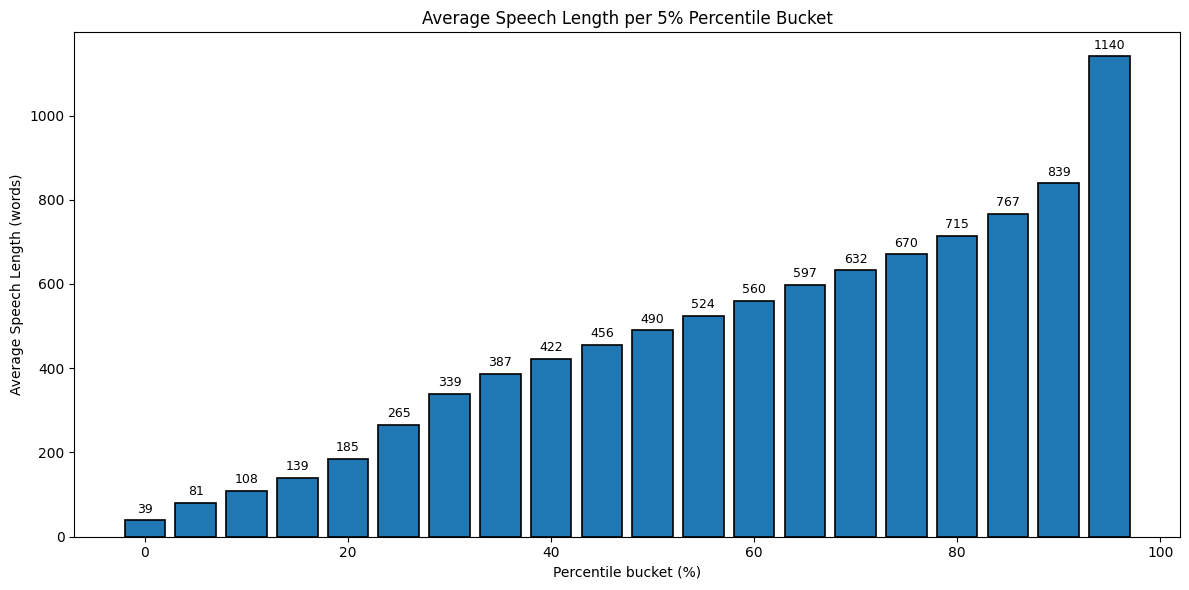

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Compute lengths
lengths = np.array([len(s.split()) for s in dataset["speech"]])

percentile_steps = np.arange(0, 101, 5)
percentile_values = np.percentile(lengths, percentile_steps)

bucket_means = []

# compute mean per percentile bucket
for i in range(len(percentile_steps) - 1):
    low = percentile_values[i]
    high = percentile_values[i+1]

    idxs = np.where((lengths >= low) & (lengths <= high))[0]

    if len(idxs) > 0:
        bucket_means.append(np.mean(lengths[idxs]))
    else:
        bucket_means.append(0)

# X-axis labels (percentile buckets)
x = percentile_steps[:-1]

fig, ax = plt.subplots(figsize=(12, 6))

# Thicker bars + black border
bars = ax.bar(
    x,
    bucket_means,
    width=4.0,              # <-- THICKER BARS
    edgecolor='black',      # <-- BORDER COLOR
    linewidth=1.2           # <-- BORDER THICKNESS
)

ax.set_xlabel("Percentile bucket (%)")
ax.set_ylabel("Average Speech Length (words)")
ax.set_title("Average Speech Length per 5% Percentile Bucket")

# annotate values
for p, val, bar in zip(x, bucket_means, bars):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        val + max(bucket_means)*0.01,
        f"{val:.0f}",
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()


In [41]:
#print 20 shortest speeches in the main = True condition
shortest_speeches = sorted(
    [s for s in dataset if s["main"]],
    key=lambda x: len(x["speech"].split())
)[:20]
for speech in shortest_speeches:
    print(f"Speaker: {speech['speaker']}, Party: {speech['party']}, Length: {len(speech['speech'].split())} words")
    print(f"Speech: {speech['speech']}\n")

Speaker: Verena Hubertz, Party: SPD, Length: 70 words
Speech: Der Bauüberhang ist eine tolle Reserve; denn wir haben über 800 000 Baugenehmigungen, wo in großen Teilen der Bau einfach noch nicht begonnen wurde. Das heißt: Wenn die schnell angereizt werden können, haben wir richtig was gewonnen, weil alles Formale schon erledigt ist. Und den Prüfauftrag aus dem Koalitionsvertrag mit der Frage „Wie kann man das vielleicht auch finanziell anreizen?“ schauen wir uns jetzt gerade im Rahmen des Haushaltsaufstellungsverfahrens an. 

Speaker: Lamya Kaddor, Party: BÜNDNIS 90/DIE GRÜNEN, Length: 70 words
Speech: Vielen Dank, Frau Präsidentin. – Sehr geehrter Herr Minister, inwieweit plant die Bundesregierung die anstehende Konferenz zu dem Nahostfriedensprozess in New York, die ja vom 17. bis zum 20. Juni 2025 stattfinden soll und bei der die Idee einer Zweistaatenlösung wiederbelebt und die Anerkennung Palästinas vorbereitet werden soll, zu unterstützen? Und inwiefern liegt die Frage der Sankti

In [6]:
from transformers import AutoTokenizer
from datasets import load_dataset, Dataset, DatasetDict
tokenizer = AutoTokenizer.from_pretrained("deepset/gbert-base")

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("C:\\Users\\Aurelio\\Documents\\Bachelor\\Data\\speeches.db")
cursor = conn.cursor()

# Query to get all speeches
query = "SELECT speech,party FROM speeches"
cursor.execute(query)

# Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

conn.close()

In [7]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.2, seed=42)

In [9]:
dataset.save_to_disk("C:\\Users\\Aurelio\\Documents\\Bachelor\\Data\\dataset_for_tf-idf")

Saving the dataset (1/1 shards): 100%|██████████| 25677/25677 [00:00<00:00, 407974.63 examples/s]


In [8]:
party_aliases = {
    "CDU/CSU": ["CDU", "CSU", "Union", "Christlich Demokratische Union", "Christlich-Soziale Union"],
    "SPD": ["SPD", "Sozialdemokratische Partei"],
    "FDP": ["FDP", "Freie Demokratische Partei", "Liberale"],
    "AfD": ["AfD", "Alternative für Deutschland"],
    "DIE LINKE": ["Die Linke", "LINKE", "Linke"],
    "BÜNDNIS 90/DIE GRÜNEN": ["Grüne", "Bündnis 90", "Bündnis 90/Die Grünen", "Die Grünen"]
}

In [9]:
import re
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("deepset/gbert-base")

def mask_party_mentions(example):
    speech = example['speech']
    
    # Get the actual mask token from the tokenizer
    mask_token = tokenizer.mask_token 
    
    # Create a list of all party names and their aliases
    all_party_terms = []
    for party, aliases in party_aliases.items():
        all_party_terms.append(party)  # Add the main party name
        all_party_terms.extend(aliases)  # Add all aliases
    
    # Sort by length (descending) to match longer terms first
    all_party_terms.sort(key=len, reverse=True)
    
    # Replace each party term with mask token
    for term in all_party_terms:
        # Use word boundaries to avoid partial matches
        pattern = r'\b' + re.escape(term) + r'\b'
        speech = re.sub(pattern, mask_token, speech, flags=re.IGNORECASE)
    
    return {'speech': speech}

# Apply the function to the dataset
dataset["test"] = dataset["test"].map(mask_party_mentions)

Map: 100%|██████████| 5136/5136 [00:13<00:00, 384.70 examples/s]


In [8]:
#Sliding window approach with overlap and padding for sequences longer than 512 tokens
def chunk_and_padd(data, chunk_size=512, overlap=50):
    tokens = tokenizer(data["speech"][0], truncation=False)["input_ids"]
    type_ids = tokenizer(data["speech"][0], truncation=False)["token_type_ids"]
    attention_mask = tokenizer(data["speech"][0], truncation=False)["attention_mask"] 
    
    chunks_tokens = []
    chunks_type_ids = []
    chunks_attention_mask = []
    labels = [] 

    for i in range(0, len(tokens), chunk_size - overlap):
        chunk_tokens = tokens[i:i + chunk_size]
        chunk_type_ids = type_ids[i:i + chunk_size]
        chunk_attention_mask = attention_mask[i:i + chunk_size]

        if len(chunk_tokens) < chunk_size:
            padding = [tokenizer.pad_token_id] * (chunk_size - len(chunk_tokens))
            chunk_tokens += padding
            chunk_type_ids += padding
            chunk_attention_mask += padding
            
        chunks_tokens.append(chunk_tokens)
       
        chunks_type_ids.append(chunk_type_ids)
        chunks_attention_mask.append(chunk_attention_mask)
        labels.append(data["party"])
  
    return {
        "input_ids": chunks_tokens,
        "token_type_ids": chunks_type_ids,
        "attention_mask": chunks_attention_mask,
        "labels": labels
    }

In [ ]:
tokenized_dataset = dataset.map(chunk_and_padd,remove_columns=["party","speech"], batched=True, batch_size=1)

In [9]:
tokenized_masked_dataset = masked_dataset.map(chunk_and_padd,remove_columns=["party","speech"], batched=True, batch_size=1)

Map: 100%|██████████| 25677/25677 [04:13<00:00, 101.16 examples/s]


In [ ]:
from datasets import load_from_disk
#data = load_from_disk("C:\\Users\\auris\\BA_code")
from datasets import  Dataset, load_dataset, DatasetDict

Code from 22.07 to preprocess and safe masked dataset

In [10]:
id2label = {0: "CDU/CSU", 1: "SPD", 2: "FDP", 3: "AfD", 4: "DIE LINKE", 5: "BÜNDNIS 90/DIE GRÜNEN"}
label2id = {"CDU/CSU": 0, "SPD": 1, "FDP": 2, "AfD": 3, "DIE LINKE": 4, "BÜNDNIS 90/DIE GRÜNEN": 5}
def flatten_label(example):
    # If "labels" is a list with exactly one string, return just the string
    return {"labels": example["labels"][0]}

tokenized_masked_dataset = tokenized_masked_dataset.map(flatten_label)
from datasets import ClassLabel

# Create a ClassLabel feature with your label names in order
class_labels = ClassLabel(names=list(label2id.keys()))
tokenized_masked_dataset = tokenized_masked_dataset.cast_column("labels", class_labels)
tokenized_masked_dataset = tokenized_masked_dataset.align_labels_with_mapping(label2id, "labels")
# 80% train, 10% test + validation
train_testvalid = tokenized_masked_dataset.train_test_split(0.2)
# Split the 20% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(0.5)
# gather everyone if you want to have a single DatasetDict
train_test_valid_dataset = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']})

Aligning the labels: 100%|██████████| 49604/49604 [00:00<00:00, 124088.44 examples/s]


In [ ]:
id2label = {0: "CDU/CSU", 1: "SPD", 2: "FDP", 3: "AfD", 4: "DIE LINKE", 5: "BÜNDNIS 90/DIE GRÜNEN"}
label2id = {"CDU/CSU": 0, "SPD": 1, "FDP": 2, "AfD": 3, "DIE LINKE": 4, "BÜNDNIS 90/DIE GRÜNEN": 5}
def flatten_label(example):
    # If "labels" is a list with exactly one string, return just the string
    return {"labels": example["labels"][0]}

data = data.map(flatten_label)
from datasets import ClassLabel

# Create a ClassLabel feature with your label names in order
class_labels = ClassLabel(names=list(label2id.keys()))
data = data.cast_column("labels", class_labels)
data = data.align_labels_with_mapping(label2id, "labels")
# 80% train, 10% test + validation
train_testvalid = data.train_test_split(0.2)
# Split the 20% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(0.5)
# gather everyone if you want to have a single DatasetDict
train_test_valid_dataset = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']})

In [11]:
#save data to disk as traub_test_valid_dataset
masked_train_test_valid_dataset = train_test_valid_dataset
masked_train_test_valid_dataset.save_to_disk("C:\\Users\\Aurelio\\Documents\\Bachelor\\Data\\masked_train_test_valid_dataset")

Saving the dataset (1/1 shards): 100%|██████████| 4960/4960 [00:00<00:00, 80640.62 examples/s]


In [ ]:
test = load_from_disk("C:\\Users\\auris\\BA_code")


In [ ]:
test["train"]["labels"]

NameError: name 'class_labels' is not defined

In [3]:
from datasets import load_from_disk
test = load_from_disk("C:\\Users\\Aurelio\\Documents\\Bachelor\\Data\\train_test_valid_dataset")

In [5]:
test["train"][0]

{'input_ids': [510,
  26008,
  2381,
  2724,
  4430,
  566,
  259,
  261,
  7971,
  6868,
  1474,
  475,
  282,
  4760,
  22823,
  26069,
  12028,
  3795,
  338,
  566,
  505,
  450,
  734,
  8881,
  853,
  755,
  585,
  199,
  4620,
  818,
  5073,
  199,
  205,
  9384,
  308,
  818,
  128,
  22823,
  16505,
  5762,
  818,
  684,
  288,
  2361,
  255,
  22476,
  1992,
  347,
  4773,
  734,
  258,
  14127,
  191,
  566,
  505,
  1542,
  1269,
  261,
  4376,
  168,
  435,
  6868,
  334,
  136,
  6325,
  262,
  1877,
  818,
  377,
  4095,
  21977,
  15073,
  782,
  371,
  566,
  2268,
  1092,
  333,
  4760,
  9659,
  818,
  128,
  268,
  20866,
  19609,
  450,
  818,
  22128,
  11536,
  338,
  136,
  125,
  21977,
  13570,
  313,
  255,
  24747,
  338,
  566,
  347,
  4011,
  261,
  2572,
  809,
  268,
  450,
  199,
  7248,
  809,
  818,
  684,
  386,
  2128,
  125,
  4450,
  3886,
  153,
  403,
  571,
  3815,
  371,
  818,
  153,
  249,
  4676,
  2361,
  855,
  7361,
  5067,
  2295,
  56